In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

# Dataset

In [10]:
df = pd.read_csv(r'data\ensemble.csv', header=None, names='x y label'.split())

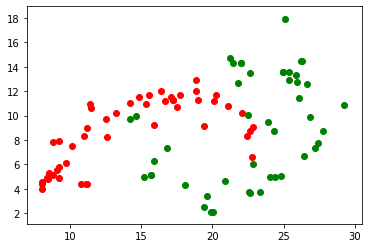

In [20]:
colors = 'r g'.split()
for idx, row in df.iterrows():
    plt.scatter(x=row.x, y=row.y, c=colors[int(row.label)])

In [31]:
X = df[['x', 'y']].to_numpy()
y = df[['label']].to_numpy().ravel()

# Bagging

In [51]:
knn = KNeighborsClassifier(n_neighbors=1)

In [52]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

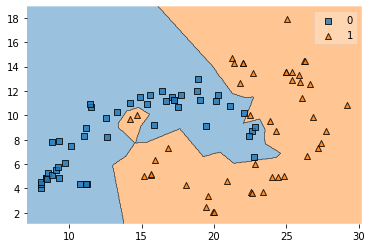

In [53]:
plot_decision_regions(X=X, y=y, clf=knn)

In [60]:
bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=1), n_estimators=100, max_samples=0.3)

In [61]:
bagging.fit(X, y)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1),
                  max_samples=0.3, n_estimators=100)

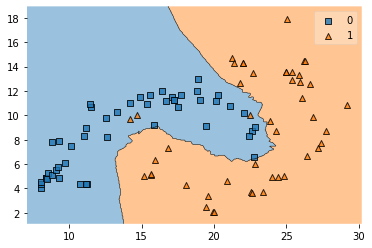

In [62]:
plot_decision_regions(X=X, y=y, clf=bagging)

In [94]:
estimators = [(f'nn {i}', KNeighborsClassifier(n_neighbors=i)) for i in range(1, 10)]
stack_cl = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), passthrough=False)

In [92]:
stack_cl.fit(X, y)

StackingClassifier(estimators=[('nn 1', KNeighborsClassifier(n_neighbors=1)),
                               ('nn 2', KNeighborsClassifier(n_neighbors=2)),
                               ('nn 3', KNeighborsClassifier(n_neighbors=3)),
                               ('nn 4', KNeighborsClassifier(n_neighbors=4)),
                               ('nn 5', KNeighborsClassifier()),
                               ('nn 6', KNeighborsClassifier(n_neighbors=6)),
                               ('nn 7', KNeighborsClassifier(n_neighbors=7)),
                               ('nn 8', KNeighborsClassifier(n_neighbors=8)),
                               ('nn 9', KNeighborsClassifier(n_neighbors=9))],
                   final_estimator=LogisticRegression(C=10), passthrough=True)

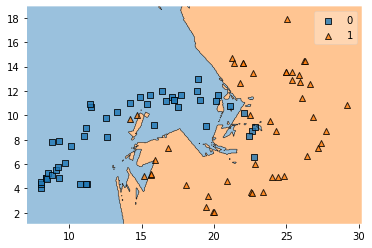

In [93]:
plot_decision_regions(X=X, y=y, clf=stack_cl)